In [1]:
%cd ..
%reload_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=
%env AD_MAX_ITEMS=1000
from torch_snippets import *
import duckdb
DF = pd.DataFrame

/home/paperspace/miniconda3/envs/vlm/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/home/paperspace/Code/hands-on-vision-language-models
env: CUDA_VISIBLE_DEVICES=
env: AD_MAX_ITEMS=1000


In [40]:
with duckdb.connect('db/predictions_v5.db') as con:
    q = f"SELECT inputs_hash, dataset_name, dataset_row_index, prediction_value, error_string, vlm_name, prediction_duration FROM Predictions where dataset_name = 'SROIE' and vlm_name = 'MiniCPM'"
    q = f"SELECT * from Predictions"
    df = con.execute(q).fetchdf().drop_duplicates(['inputs_hash', 'vlm_name'], keep='last')
df

,inputs_hash,prompt,kwargs,vlm_name,dataset_name,dataset_row_index,prediction_value,prediction_duration,error_string
0,c6ba10b6f77108056c70a584b7680b24def459196de248...,Extract the following data from given image - ...,{},Claude_35,CORD,0,"{\n ""id"": ""msg_01Hwrf9rt3AswWemoUg2RTV9"",\n ...",2.936,None
1,055e421b218f8f7f7ac464d0484e464c93b2ccdc958cf1...,Extract the following data from given image - ...,{},Claude_35,CORD,1,"{\n ""id"": ""msg_017u7zzXw25RaLbb97JDubZs"",\n ...",4.871,None
2,12456fe5dd0f7026db51e11b8c8e6a4edb4f795b7d7727...,Extract the following data from given image - ...,{},Claude_35,CORD,2,"{\n ""id"": ""msg_01TtJM3EzUPqhgqMmFTL5TTP"",\n ...",4.030,None
3,6eb688a999769ba02f202039cb883bc8711f689907d74b...,Extract the following data from given image - ...,{},Claude_35,CORD,3,"{\n ""id"": ""msg_01HSZrBp3cVCR9znQzmyvmGq"",\n ...",3.218,None
4,d917e8cc133e937681e0809f8b9eb14ee08e340c7fc6a4...,"What are the ADDRESS,COMPANY,DATE,TOTAL in the...",{},Claude_35,SROIE,0,"{\n ""id"": ""msg_01AZ1v1dzJ9VukSuiHncx5Xv"",\n ...",3.480,None
...,...,...,...,...,...,...,...,...,...
1148,e23e362a9ea7237671f92944d3092b1654cb3e728ee4ea...,"What are the ADDRESS,COMPANY,DATE,TOTAL in the...",{},MiniCPM,SROIE,38,"{\n ""ADDRESS"": ""50,JALAN SUTERA TANJUNG 5/4 T...",3.236,None
1149,3bb282ca9025578dca4e7f5565d3c2dd13e89aa3381725...,"What are the ADDRESS,COMPANY,DATE,TOTAL in the...",{},MiniCPM,SROIE,39,"Based on the image, here is the extracted info...",3.093,None
1150,485153ada4364aeef20db963dc384ee9ad9ba9e1fbf015...,"What are the ADDRESS,COMPANY,DATE,TOTAL in the...",{},MiniCPM,SROIE,40,"{\n ""ADDRESS"": ""69G, JALAN SS21/60, DAMANSARA...",1.983,None
1151,b69bad48768136590320254b0eb88ca536d4370c145d81...,"What are the ADDRESS,COMPANY,DATE,TOTAL in the...",{},MiniCPM,SROIE,41,"{\n ""ADDRESS"": ""LOT 3, JALAN PELABUR 23/1, 40...",1.886,None


In [9]:
from vlm.data.cord import evaluate_cord
from vlm.data.sroie import evaluate_sroie

def barchart(df):
    df = df.reset_index().melt(id_vars='index', var_name='model', value_name='score')
    df.rename(columns={'index': 'category'}, inplace=True)
    chart = alt.Chart(df).mark_bar().encode(
        x='model:N',
        y='score:Q',
        color='model:N',
        column='category:N'
    ).properties(width=100)
    return chart


In [55]:
sroie_results = AD()
for vlm in df.vlm_name.unique():
    sroie_results[vlm] = evaluate_sroie(vlm)

[09/24/24 19:24:52] WARNING  Failed to JSON parse                                                                                                     ]8;id=165946;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=115636;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                                                                                                                                                                            
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=173888;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=104378;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                                                                                                                                                                            
                             -------------------------                                                                                                                      
                                                                                                                                                                            

[09/24/24 19:24:53] WARNING  Failed to JSON parse                                                                                                     ]8;id=541248;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=386040;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                                                                                                                                                                            
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=333690;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=70164;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                                                                                                                                                                            
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=790923;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=733932;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                                                                                                                                                                            
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=298324;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=638147;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                                                                                                                                                                            
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=132622;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=886372;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                                                                                                                                                                            
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=896694;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=674177;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                                                                                                                                                                            
                             -------------------------                                                                                                                      
                                                                                                                                                                            

[09/24/24 19:25:04] WARNING  Failed to JSON parse                                                                                                     ]8;id=902065;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=69806;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                               "ADDRESS": "Lot 3, Jalan Pahlawan, 24, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,                       
                             68, 70, 72, 74, 76, 78, 80,                                                                                                                    
                             -------------------------                                                                                                                      
                                                                                                                                                                            

In [57]:
cache = sroie_results.fetch2(key='cache')

In [58]:
cache.Bunny.cache.COMPANY.query('scores == False')

,predictions,references,scores
0,SUL ALAM JAYA TRANSPORT,KEDAI PAPAN YEW CHUAN,False
1,"HIGHFIELD 1ND 1550 LAKESIDE AVE. ALBANY, NY 12207",HIGH FIVE ENTERPRISE,False
2,The Cut Steakhouse & Bar,The Cut Steakhouse &Burgers,False
3,JCPENNEY,AEON CO. (M) BHD,False
4,SANYO STATIONERY SHOP,SANYU STATIONERY SHOP,False
...,...,...,...
91,UNIKA INVESTMENTS (PTY) LTD,UNIHAKKA INTERNATIONAL SDN BHD,False
92,IKEA,IKANO HANDEL SON BHD,False
93,99 Speed Mart Sdn Bhd,99 SPEED MART S/B,False
94,Syarikat Kamarul Azhar & Co.,SYARIKAT KAM LAI SEONG SDN BHD,False


In [52]:
cache.Qwen2.cache.COMPANY.query('scores == False')

,predictions,references,scores
2,The Cut Steakhouse & Burgers,The Cut Steakhouse &Burgers,False
5,HOME'S HARMONY @ 1 UTAMA SHOPPING CENTRE,MONSIEUR ( M ) SDN. BHD.,False
9,99 SPEED MART S/B,99 SPEED MART 5/B,False
11,The GeoVenture (Freedom Optimum Sdn Bhd),(Freedom Optimum Sdn Bhd),False
20,KEDAI BUKU NEW ACHIEVERS,(EDAI BUKU NEW ACHEIVERS,False
22,WESTERN EASTERN STATIONERY SDN.BHD,WESTERN EASTERN STATIONERY SON. BHD,False
23,GREEN LANE PHARMACY SDN BHD,GREEN LANE PHARMACY SON BHD,False
24,EXQUISITE GARDEN SDN BHD,EXQUISITE GARDEN SON BHD,False
27,OLDTOWN WHITE COFFEE,Old Town Kopitiam Sdn Bhd,False
33,EVERGREEN LIGHT SDN BHD,EVERGREEN LIGHT SON BHD,False


In [51]:
cache.MiniCPM.cache.COMPANY.query('scores == False')

,predictions,references,scores
3,AEDN CO.(M) BHD (126926-H),AEON CO. (M) BHD,False
5,HOME'S HARMONY @ 1 UTAMA SHOPPING CENTRE MONSI...,MONSIEUR ( M ) SDN. BHD.,False
7,AEON CO.(M) BHD (126928-H),AEON CO. (M) BHD,False
8,CROSS CHANNEL NETWORK SDN.BHD,CROSS CHANNEL NETWORK SDN. BHD.,False
9,99 SPEED MART S/B (519537-X),99 SPEED MART 5/B,False
10,SU C I AL A M J A Y A T R A N S P O R T,KEDAI PAPAN YEW CHUAN,False
11,The GeoVenture (Freedom Optimum Sdn Bhd),(Freedom Optimum Sdn Bhd),False
12,BENS INDEPENDENT GROCER SDN. BHD (913144-A),BENS INDEPENDENT GROCER SDN. BHD,False
15,"URBAN IDEA SDN BHD (417940-M), A-G-06, DATARAN...",URBAN IDEA SDN BHD,False
16,Becon Enterprise Sdn Bhd (82256-V),Becon Enterprise Sdn Bhd,False


In [56]:
fields = pd.DataFrame(AD({k:v.aggregate for k,v in sroie_results.fetch2(key='aggregate').items()}).d)
barchart(fields)

alt.Chart(...)

In [8]:
cord_results = AD()
for vlm in df.vlm_name.unique():
    cord_results[vlm] = evaluate_cord(vlm)

[09/24/24 18:57:12] WARNING  Failed to JSON parse                                                                                                     ]8;id=33218;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=822668;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {                                                                                                                                      
                                         "nm": "4 AMBUSH DBL CHS",                                                                                                          
                                         "price": 60000,                                                                                                                    
                                         "cnt": 10,                                                                                                                         
                                         "unitprice": 60000 / 10                                                                                                            
                                     },                                                                                                                                     
                                     {                                                                                                                                      
                                         "nm": "10 AMBUSH CHS",                                                                                                             
                                         "price": 100000,                                                                                                                   
                                         "cnt": 10,                                                                                                                         
                                         "unitprice": 100000 / 10                                                                                                           
                                     }                                                                                                                                      
                                 ],                                                                                                                                         
                                 "subtotal": {                                                                                                                              
                                     "subtotal_price": 160000,                                                                                                              
                                     "tax_price": 160000                                                                                   

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=748575;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=274854;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {                                                                                                                                      
                                         "nm": "PKT AYAM",                                                                                                                  
                                         "price": 33000,                                                                                                                    
                                         "cnt": 2,                                                                                                                          
                                         "unitprice": 1800                                                                                                                  
                                     },                                                                                                                                     
                                     {                                                                                                                                      
                                         "nm": "GULAI OTAK",                                                                                                                
                                         "price": 23000,                                                                                                                    
                                         "cnt": 2,                                                                                                                          
                                         "unitprice": 1200                                                                                                                  
                                     }                                                                                                                                      
                                 ],                                                                                                                                         
                                 "subtotal": {                                                                                                                              
                                     "subtotal_price": 56000,                                                                                                               
                                     "tax_price": 56000 * 0.1                                                                             

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=980026;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=699908;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {                                                                                                                                      
                                         "nm": "Item 1",                                                                                                                    
                                         "price": 28636,                                                                                                                    
                                         "cnt": 1,                                                                                                                          
                                         "unitprice": 28636 / 1                                                                                                             
                                     },                                                                                                                                     
                                     {                                                                                                                                      
                                         "nm": "Item 2",                                                                                                                    
                                         "price": 28636,                                                                                                                    
                                         "cnt": 1,                                                                                                                          
                                         "unitprice": 28636 / 1                                                                                                             
                                     },                                                                                                                                     
                                     {                                                                                                                                      
                                         "nm": "Item 3",                                                                                                                    
                                         "price": 28636,                                                                                                                    
                                         "cnt": 1,                                                                                        

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=995131;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=275763;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {                                                                                                                                      
                                         "nm": "Ash Chick Sambal Matah",                                                                                                    
                                         "price": 75000,                                                                                                                    
                                         "cnt": 5,                                                                                                                          
                                         "unitprice": 1500                                                                                                                  
                                     },                                                                                                                                     
                                     {                                                                                                                                      
                                         "nm": "Jamur Goreng",                                                                                                              
                                         "price": 10000,                                                                                                                    
                                         "cnt": 2,                                                                                                                          
                                         "unitprice": 500                                                                                                                   
                                     }                                                                                                                                      
                                 ],                                                                                                                                         
                                 "subtotal": {                                                                                                                              
                                     "subtotal_price": 85000,                                                                                                               
                                     "tax_price": 85000 * 0.1                                                                             

[09/24/24 18:57:13] WARNING  Failed to JSON parse                                                                                                     ]8;id=324887;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=304769;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {                                                                                                                                      
                                         "nm": "Dresses",                                                                                                                   
                                         "price": 17727,                                                                                                                    
                                         "cnt": 1,                                                                                                                          
                                         "unitprice": 17727                                                                                                                 
                                     },                                                                                                                                     
                                     {                                                                                                                                      
                                         "nm": "Dresses",                                                                                                                   
                                         "price": 17727,                                                                                                                    
                                         "cnt": 1,                                                                                                                          
                                         "unitprice": 17727                                                                                                                 
                                     },                                                                                                                                     
                                     {                                                                                                                                      
                                         "nm": "Dresses",                                                                                                                   
                                         "price": 17727,                                                                                                                    
                                         "cnt": 1,                                                                                        

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=816892;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=811363;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {                                                                                                                                      
                                         "nm": "Pecel Komplit + Nasi",                                                                                                      
                                         "price": 42000,                                                                                                                    
                                         "cnt": 1,                                                                                                                          
                                         "unitprice": 42000                                                                                                                 
                                     },                                                                                                                                     
                                     {                                                                                                                                      
                                         "nm": "Soto Kudus",                                                                                                                
                                         "price": 47000,                                                                                                                    
                                         "cnt": 1,                                                                                                                          
                                         "unitprice": 47000                                                                                                                 
                                     },                                                                                                                                     
                                     {                                                                                                                                      
                                         "nm": "Mineral Water",                                                                                                             
                                         "price": 18000,                                                                                                                    
                                         "cnt": 2,                                                                                        

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=870469;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=806065;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {                                                                                                                                      
                                         "nm": "APPLE CINNAMON PASTRY",                                                                                                     
                                         "price": 22000,                                                                                                                    
                                         "cnt": 1,                                                                                                                          
                                         "unitprice": 22000 / 1                                                                                                             
                                     },                                                                                                                                     
                                     {                                                                                                                                      
                                         "nm": "ROYAL CHEESE TART",                                                                                                         
                                         "price": 32000,                                                                                                                    
                                         "cnt": 1,                                                                                                                          
                                         "unitprice": 32000 / 1                                                                                                             
                                     }                                                                                                                                      
                                 ],                                                                                                                                         
                                 "subtotal": {                                                                                                                              
                                     "subtotal_price": 54000,                                                                                                               
                                     "tax_price": 0                                                                                       

[09/24/24 18:57:15] WARNING  Failed to JSON parse                                                                                                     ]8;id=460409;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=46835;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {                                                                                                                                      
                                         "nm": "1 COOKIES AND CREAM",                                                                                                       
                                         "price": 20909,                                                                                                                    
                                         "cnt": 1,                                                                                                                          
                                         "unitprice": 20909 / 1                                                                                                             
                                     }                                                                                                                                      
                                 ],                                                                                                                                         
                                 "subtotal": {                                                                                                                              
                                     "subtotal_price": 20909,                                                                                                               
                                     "tax_price": 20909 * 0.1                                                                                                               
                                 },                                                                                                                                         
                                 "total": {                                                                                                                                 
                                     "total_price": 23000,                                                                                                                  
                                     "cashprice": 25000,                                                                                                                    
                                     "changeprice": 2000                                                                                                                    
                                 }                                                                                                         

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=538670;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=584307;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {                                                                                                                                      
                                         "nm": "Cireng Pandawa",                                                                                                            
                                         "price": 26818,                                                                                                                    
                                         "cnt": 1,                                                                                                                          
                                         "unitprice": 26818 / 1                                                                                                             
                                     }                                                                                                                                      
                                 ],                                                                                                                                         
                                 "subtotal": {                                                                                                                              
                                     "subtotal_price": 26818,                                                                                                               
                                     "tax_price": 0                                                                                                                         
                                 },                                                                                                                                         
                                 "total": {                                                                                                                                 
                                     "total_price": 29500,                                                                                                                  
                                     "cashprice": 29500,                                                                                                                    
                                     "changeprice": 0                                                                                                                       
                                 }                                                                                                        

[09/24/24 18:57:38] WARNING  Failed to JSON parse                                                                                                     ]8;id=993705;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=108159;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "BLACK SAKURA", "price": 45.455, "cnt": 1, "unitprice": 45.455},                                                                
                                     {"nm": "COOKIE DOH SAUCES", "price": 0, "cnt": 1, "unitprice": 0},                                                                     
                                     {"nm": "NATA DE COCO", "price": 0, "cnt": 1, "unitprice": 0}                                                                           
                                 ]                                                                                                                                          
                             }                                                                                                                                              
                             ```                                                                                                                                            
                                                                                                                                                                            
                             For sub-total:                                                                                                                                 
                             ```json                                                                                                                                        
                             {                                                                                                                                              
                                 "subtotal_price": 45.455,                                                                                                                  
                                 "tax_price": 4.545                                                                                                                         
                             }                                                                                                                                              
                             ```                                                                                                                                            
                                                                                                                                                                            
                             For total:                                                                                                   

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=347502;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=816606;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "TWIST STRAWBERRY DONUT", "price": 10,000, "cnt": 1, "unitprice": 10,000},                                                      
                                     {"nm": "TLJ CROQUETTE", "price": 17,000, "cnt": 1, "unitprice": 17,000},                                                               
                                     {"nm": "POTATO PEPPER BAGEL", "price": 16,000, "cnt": 1, "unitprice": 16,000}                                                          
                                 ],                                                                                                                                         
                                 "subtotal": {"subtotal_price": 43,000, "tax_price": null},                                                                                 
                                 "total": {"total_price": 50,000, "cashprice": 7,000, "changeprice": 7,000}                                                                 
                             }                                                                                                                                              
                             -------------------------                                                                                                                      
                                                                                                                                                                            

[09/24/24 18:57:39] WARNING  Failed to JSON parse                                                                                                     ]8;id=342219;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=44468;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                     "nm": "GRILLED BABY POTATO (R)",                                                                                                       
                                     "price": 50.5,                                                                                                                         
                                     "cnt": 1,                                                                                                                              
                                     "unitprice": 50.5                                                                                                                      
                                 },                                                                                                                                         
                                 {                                                                                                                                          
                                     "nm": "HOT TUNA",                                                                                                                      
                                     "price": 67.0,                                                                                                                         
                                     "cnt": 1,                                                                                                                              
                                     "unitprice": 67.0                                                                                                                      
                                 }                                                                                                                                          
                             ]                                                                                                                                              
                             ```                                                                                                                                            
                                                                                                                                                                            
                             For sub-total:                                                                                                                                 
                             ```json                                                                                                                                        
                             {                                                                                                             

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=176737;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=157665;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {                                                                                                                                      
                                         "nm": "XXL Crispy Chicken",                                                                                                        
                                         "price": 40000,                                                                                                                    
                                         "cnt": 1,                                                                                                                          
                                         "unitprice": 40000                                                                                                                 
                                     }                                                                                                                                      
                                 ]                                                                                                                                          
                             }                                                                                                                                              
                             ```                                                                                                                                            
                                                                                                                                                                            
                             For sub-total:                                                                                                                                 
                             ```json                                                                                                                                        
                             {                                                                                                                                              
                                 "subtotal": {                                                                                                                              
                                     "subtotal_price": 40000                                                                                                                
                                 }                                                                                                        

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=149432;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=845367;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {"nm": "Chicken Maryland", "price": 47619.0, "cnt": 1, "unitprice": 47619.0},                                                                  
                                 {"nm": "Cappuccino (Hot/Iced)", "price": 30303.0, "cnt": 1, "unitprice": 30303.0},                                                         
                                 {"nm": "Naga Lychee Juice", "price": 34632.0, "cnt": 1, "unitprice": 34632.0},                                                             
                                 {"nm": "Cafe Latte", "price": 30303.0, "cnt": 1, "unitprice": 30303.0},                                                                    
                                 {"nm": "Hot Chocolate Marshmallow", "price": 30303.0, "cnt": 1, "unitprice": 30303.0},                                                     
                                 {"nm": "Chicken Caesar Salad", "price": 43290.0, "cnt": 1, "unitprice": 43290.0},                                                          
                                 {"nm": "Mineral Water", "price": 12987.0, "cnt": 1, "unitprice": 12987.0},                                                                 
                                 {"nm": "Mineral Water", "price": 12987.0, "cnt": 1, "unitprice": 12987.0},                                                                 
                                 {"nm": "Lychee/Peach/Lemon/Mango", "price": 25747.0, "cnt": 1, "unitprice": 25747.0},                                                      
                                 {"nm": "Chicken Maryland", "price": 47619.0, "cnt": 1, "unitprice": 47619.0}                                                               
                             ]                                                                                                                                              
                             ```                                                                                                                                            
                                                                                                                                                                            
                             For sub-total:                                                                                                                                 
                             ```json                                                                                                                                        
                             {                                                                                                                                              
                                 "subtotal_price": 361017.68,                                                                                                               
                                 "tax_price": 49892.0                                                                                     

[09/24/24 18:57:40] WARNING  Failed to JSON parse                                                                                                     ]8;id=84562;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=704901;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {                                                                                                                                      
                                         "nm": "KACANG MERAH",                                                                                                              
                                         "price": 10000,                                                                                                                    
                                         "cnt": 1,                                                                                                                          
                                         "unitprice": 10000                                                                                                                 
                                     }                                                                                                                                      
                                 ]                                                                                                                                          
                             }                                                                                                                                              
                             ```                                                                                                                                            
                                                                                                                                                                            
                             For sub-total:                                                                                                                                 
                             ```json                                                                                                                                        
                             {                                                                                                                                              
                                 "subtotal_price": 10000,                                                                                                                   
                                 "tax_price": null                                                                                                                          
                             }                                                                                                             

[09/24/24 18:57:41] WARNING  Failed to JSON parse                                                                                                     ]8;id=485259;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=426164;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                     "nm": "1001-Choco Bun",                                                                                                                
                                     "price": 22.00,                                                                                                                        
                                     "cnt": 1,                                                                                                                              
                                     "unitprice": 22.00                                                                                                                     
                                 }                                                                                                                                          
                             ]                                                                                                                                              
                             ```                                                                                                                                            
                                                                                                                                                                            
                             For sub-total:                                                                                                                                 
                             ```json                                                                                                                                        
                             {                                                                                                                                              
                                 "subtotal_price": 22.00,                                                                                                                   
                                 "tax_price": null                                                                                                                          
                             }                                                                                                                                              
                             ```                                                                                                                                            
                                                                                                                                                                            
                             For total:                                                                                                   

[09/24/24 18:57:42] WARNING  Failed to JSON parse                                                                                                     ]8;id=512790;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=799497;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {                                                                                                                                      
                                         "nm": "Kroket",                                                                                                                    
                                         "price": 120000,                                                                                                                   
                                         "cnt": 1,                                                                                                                          
                                         "unitprice": 120000                                                                                                                
                                     },                                                                                                                                     
                                     {                                                                                                                                      
                                         "nm": "Arem Arem",                                                                                                                 
                                         "price": 240000,                                                                                                                   
                                         "cnt": 2,                                                                                                                          
                                         "unitprice": 120000                                                                                                                
                                     }                                                                                                                                      
                                 ]                                                                                                                                          
                             }                                                                                                                                              
                             ```                                                                                                                                            
                                                                                                                                          

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=774504;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=702324;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {                                                                                                                                      
                                         "nm": "TICKET CP",                                                                                                                 
                                         "price": 240000,                                                                                                                   
                                         "cnt": 1,                                                                                                                          
                                         "unitprice": 240000                                                                                                                
                                     }                                                                                                                                      
                                 ]                                                                                                                                          
                             }                                                                                                                                              
                                                                                                                                                                            
                             For sub-total:                                                                                                                                 
                             {                                                                                                                                              
                                 "subtotal_price": 250000,                                                                                                                  
                                 "tax_price": 0                                                                                                                             
                             }                                                                                                                                              
                                                                                                                                                                            
                             For total:                                                                                                   

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=642087;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=583984;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {                                                                                                                                      
                                         "nm": "BBQ Chicken - Tidak Pedas",                                                                                                 
                                         "price": 41000,                                                                                                                    
                                         "cnt": 1,                                                                                                                          
                                         "unitprice": 41000                                                                                                                 
                                     }                                                                                                                                      
                                 ]                                                                                                                                          
                             }                                                                                                                                              
                             ```                                                                                                                                            
                                                                                                                                                                            
                             For sub-total:                                                                                                                                 
                             ```json                                                                                                                                        
                             {                                                                                                                                              
                                 "subtotal": {                                                                                                                              
                                     "subtotal_price": 41000,                                                                                                               
                                     "tax_price": 0                                                                                       

[09/24/24 18:57:47] WARNING  Failed to JSON parse                                                                                                     ]8;id=68029;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=848700;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "J STB PROMO", "price": 175000, "cnt": 1, "unitprice": 175000},                                                                 
                                     {"nm": "Y.B BAT", "price": 460000, "cnt": 1, "unitprice": 460000}                                                                      
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=103970;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=515293;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Ice Blended Avocado Coffee", "price": 8.00, "cnt": 1, "unitprice": 8.00},                                                      
                                     {"nm": "Chicken Rosty", "price": 5.00, "cnt": 1, "unitprice": 5.00}                                                                    
                                 ],                                                                                                                                         
                                 "subtotal": {"subtotal_price": 13.00, "tax_price": 0.00}                                                                                   
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=827613;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=959538;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Toast with butter", "price": 31.0000, "cnt": 1, "unitprice": 31.0000}                                                          
                                 ],                                                                                                                                         
                                 "subtotal": {"subtotal_price": 31.0000, "tax_price": 0.0000},                                                                              
                                 "total": {"total_price": 31.0000, "cashprice": 31.0000, "changeprice": 0.0000}                                                             
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=240050;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=668168;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "1. Egg Tart", "price": 13000, "cnt": 1, "unitprice": 13000},                                                                   
                                     {"nm": "2. Chococust Bread", "price": 24000, "cnt": 1, "unitprice": 24000}                                                             
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=697813;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=50856;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {                                                                                                                                      
                                         "nm": "1 (REG) BLACK SAKURA",                                                                                                      
                                         "price": 45500,                                                                                                                    
                                         "cnt": 1,                                                                                                                          
                                         "unitprice": 45500                                                                                                                 
                                     },                                                                                                                                     
                                     {                                                                                                                                      
                                         "nm": "1 (REG) COOKIE DOH SAUCES",                                                                                                 
                                         "price": 45500,                                                                                                                    
                                         "cnt": 1,                                                                                                                          
                                         "unitprice": 45500                                                                                                                 
                                     }                                                                                                                                      
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=421848;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=755781;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Bumbu Kaldu Ayam", "price": 36000, "cnt": 1, "unitprice": 36000},                                                              
                                     {"nm": "Tunai", "price": 50000, "cnt": 1, "unitprice": 50000}                                                                          
                                 ],                                                                                                                                         
                                 "subtotal": {"subtotal_price": 86000, "tax_price": 0}                                                                                      
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=255594;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=82163;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "BASIL KUNDAI", "price": 43.466, "cnt": 1, "unitprice": 43.466},                                                                
                                     {"nm": "MINERAL GELAS", "price": 1.3, "cnt": 1, "unitprice": 1.3}                                                                      
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=435770;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=894049;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Red Velvet Cake", "price": 25.1000, "cnt": 1, "unitprice": 25.1000},                                                           
                                     {"nm": "Iced Coffee", "price": 2.7500, "cnt": 1, "unitprice": 2.7500}                                                                  
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=922232;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=961742;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Lemon Tea (Caramel)", "price": 26.0000, "cnt": 1, "unitprice": 26.0000}                                                        
                                 ],                                                                                                                                         
                                 "subtotal": {"subtotal_price": 26.0000, "tax_price": 0.0000}                                                                               
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=450185;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=729698;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "1L Black Sakura", "price": 0.00, "cnt": 1, "unitprice": 0.00},                                                                 
                                     {"nm": "1L Longan", "price": 0.00, "cnt": 1, "unitprice": 0.00}                                                                        
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=417849;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=446260;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Gob Na Ma", "price": 25.000, "cnt": 1, "unitprice": 25.000},                                                                   
                                     {"nm": "Moguri Hot", "price": 14.000, "cnt": 1, "unitprice": 14.000}                                                                   
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=479587;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=610990;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Propolis Cair 1", "price": 1560000, "cnt": 1, "unitprice": 1560000},                                                           
                                     {"nm": "Tun", "price": 150000, "cnt": 1, "unitprice": 150000}                                                                          
                                 ],                                                                                                                                         
                                 "subtotal": {"subtotal_price": 1560000, "tax_price": 0}                                                                                    
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=397281;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=876881;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "1. Garlic Nuts", "price": 65.00, "cnt": 1, "unitprice": 65.00},                                                                
                                     {"nm": "1. Cashew Nuts", "price": 50.00, "cnt": 1, "unitprice": 50.00}                                                                 
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=8691;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=756813;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Nasi GOR SD TL", "price": 35000, "cnt": 1, "unitprice": 35000},                                                                
                                     {"nm": "ES Teh Tarik", "price": 15000, "cnt": 1, "unitprice": 15000}                                                                   
                                 ],                                                                                                                                         
                                 "subtotal": {"subtotal_price": 50000, "tax_price": 0}                                                                                      
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=204841;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=426207;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "IMDI SOFT STEAMED CHEESE", "price": 20.000, "cnt": 2, "unitprice": 10.000},                                                    
                                     {"nm": "IMDI SOFT STEAMED CHOCOLA", "price": 20.000, "cnt": 1, "unitprice": 20.000}                                                    
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=690854;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=672426;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {                                                                                                                                      
                                         "nm": "Carrot Flakes Cookies",                                                                                                     
                                         "price": 54.000,                                                                                                                   
                                         "cnt": 50.000,                                                                                                                     
                                         "unitprice": 1.080                                                                                                                 
                                     },                                                                                                                                     
                                     {                                                                                                                                      
                                         "nm": "Chokolate Cookies",                                                                                                         
                                         "price": 62.000,                                                                                                                   
                                         "cnt": 52.000,                                                                                                                     
                                         "unitprice": 1.192                                                                                                                 
                                     }                                                                                                                                      
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=824218;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=834166;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Twi J Strawberry Donut", "price": 10000, "cnt": 1, "unitprice": 10000},                                                        
                                     {"nm": "Tl J Croquette", "price": 16000, "cnt": 1, "unitprice": 16000}                                                                 
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=803909;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=58368;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Cap Cay", "price": 155000, "cnt": 1, "unitprice": 155000},                                                                     
                                     {"nm": "Minuman", "price": 60000, "cnt": 2, "unitprice": 30000},                                                                       
                                     {"nm": "Lain-Lain", "price": 138000, "cnt": 1, "unitprice": 138000}                                                                    
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=270658;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=399522;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "SAMGYEOPAL", "price": 1490000, "cnt": 1, "unitprice": 1490000},                                                                
                                     {"nm": "SUL LUNG TANG", "price": 1000000, "cnt": 1, "unitprice": 1000000}                                                              
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=391372;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=774317;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Cold Promocha", "price": 109495, "cnt": 1, "unitprice": 109495},                                                               
                                     {"nm": "Abura Jodon Spicy", "price": 54450, "cnt": 1, "unitprice": 54450},                                                             
                                     {"nm": "Kake Udon", "price": 127272, "cnt": 1, "unitprice": 127272}                                                                    
                             -------------------------                                                                                                                      
                                                                                                                                                                            

[09/24/24 18:57:48] WARNING  Failed to JSON parse                                                                                                     ]8;id=264064;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=286427;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {                                                                                                                                      
                                         "nm": "Grilled Baby Potato",                                                                                                       
                                         "price": 50,                                                                                                                       
                                         "cnt": 1000,                                                                                                                       
                                         "unitprice": 0.05                                                                                                                  
                                     },                                                                                                                                     
                                     {                                                                                                                                      
                                         "nm": "Hot Tuna",                                                                                                                  
                                         "price": 67,                                                                                                                       
                                         "cnt": 1000,                                                                                                                       
                                         "unitprice": 0.067                                                                                                                 
                                     }                                                                                                                                      
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=615121;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=271581;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Ash Chik Sambal", "price": 75000, "cnt": 5, "unitprice": 15000},                                                               
                                     {"nm": "Subutotal", "price": 85000, "cnt": 1, "unitprice": 85000}                                                                      
                                 ],                                                                                                                                         
                                 "subtotal": {"subtotal_price": 85000, "tax_price": 0}                                                                                      
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=484161;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=77091;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "2 Twist Donut", "price": 18000, "cnt": 2, "unitprice": 9000},                                                                  
                                     {"nm": "1 Banana Nut Bread", "price": 13000, "cnt": 1, "unitprice": 13000},                                                            
                                     {"nm": "1 Banana Nut Roll", "price": 12000, "cnt": 1, "unitprice": 12000}                                                              
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=29714;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=574344;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "XOI Crispy Chicken", "price": 40.0000, "cnt": 1, "unitprice": 40.0000}                                                         
                                 ],                                                                                                                                         
                                 "subtotal": {"subtotal_price": 40.0000, "tax_price": 0.0000}                                                                               
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=524406;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=914937;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Popcorn Salt", "price": 20.0000, "cnt": 1, "unitprice": 20.0000}                                                               
                                 ],                                                                                                                                         
                                 "subtotal": {"subtotal_price": 20.0000, "tax_price": 0.0000},                                                                              
                                 "total": {"total_price": 20.0000, "cashprice": 20.0000, "changeprice": 0.0000}                                                             
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=26838;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=825140;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "XLB ORG PARK 10", "price": 78000, "cnt": 1, "unitprice": 78000},                                                               
                                     {"nm": "SISTOBAI", "price": 65000, "cnt": 1, "unitprice": 65000}                                                                       
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=942672;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=746262;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "HILTSBR LUNCH BOX 3 SET", "price": 1, "cnt": 3, "unitprice": 0.33},                                                            
                                     {"nm": "RED BAG & SP", "price": 1, "cnt": 1, "unitprice": 1.54}                                                                        
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=813786;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=276861;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Chicken Mary Land", "price": 4970.00, "cnt": 1, "unitprice": 4970.00},                                                         
                                     {"nm": "Caprese Hrt", "price": 3236.00, "cnt": 1, "unitprice": 3236.00}                                                                
                             -------------------------                                                                                                                      
                                                                                                                                                                            

[09/24/24 18:57:49] WARNING  Failed to JSON parse                                                                                                     ]8;id=715477;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=990226;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {                                                                                                                                      
                                         "nm": "Plastic Bag Red Central SI",                                                                                                
                                         "price": 0.00,                                                                                                                     
                                         "cnt": 1,                                                                                                                          
                                         "unitprice": 0.00                                                                                                                  
                                     }                                                                                                                                      
                                 ],                                                                                                                                         
                                 "subtotal": {                                                                                                                              
                                     "subtotal_price": 0.00,                                                                                                                
                                     "tax_price": 0.00                                                                                                                      
                                 }                                                                                                                                          
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=327081;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=760865;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "1 x S-Hazelnut KIT", "price": 25.5000, "cnt": 1, "unitprice": 25.5000}                                                         
                                 ],                                                                                                                                         
                                 "subtotal": {"subtotal_price": 25.5000, "tax_price": 2.7220}                                                                               
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=449554;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=536904;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "1 Plan Yogurt", "price": 12000, "cnt": 1, "unitprice": 12000},                                                                 
                                     {"nm": "1 Chocolate Melt", "price": 11000, "cnt": 1, "unitprice": 11000}                                                               
                                 ],                                                                                                                                         
                                 "subtotal": {"subtotal_price": 23000, "tax_price": 27000}                                                                                  
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=329143;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=835890;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "VITAMIN C", "price": 40.56, "cnt": 1, "unitprice": 40.56},                                                                     
                                     {"nm": "SALMON", "price": 42.25, "cnt": 1, "unitprice": 42.25}                                                                         
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=110807;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=677076;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Pepel Komplit", "price": 42000, "cnt": 1, "unitprice": 42000},                                                                 
                                     {"nm": "Sodium Chloride Water", "price": 180000, "cnt": 2, "unitprice": 90000}                                                         
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=366355;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=78851;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Apple Cinnamon Pastry", "price": 22.0000, "cnt": 1, "unitprice": 22.0000},                                                     
                                     {"nm": "Royal Cheese Tart", "price": 32.0000, "cnt": 2, "unitprice": 16.0000}                                                          
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=899487;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=387555;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "ICED TT", "price": 20.0000, "cnt": 2.0000, "unitprice": 10.0000}                                                               
                                 ],                                                                                                                                         
                                 "subtotal": {"subtotal_price": 20.0000, "tax_price": 0.0000}                                                                               
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=509805;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=612173;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Tea", "price": 78, "cnt": 5, "unitprice": 15.6},                                                                               
                                     {"nm": "Udang Telur Asin", "price": 47, "cnt": 1, "unitprice": 47},                                                                    
                                     {"nm": "Kantan Rasa", "price": 45, "cnt": 2, "unitprice": 22.5}                                                                        
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=132568;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=651855;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {                                                                                                                                      
                                         "nm": "Topping Milo Sparkle",                                                                                                      
                                         "price": 1250,                                                                                                                     
                                         "cnt": 1,                                                                                                                          
                                         "unitprice": 1250                                                                                                                  
                                     },                                                                                                                                     
                                     {                                                                                                                                      
                                         "nm": "Bola Ubi Mini",                                                                                                             
                                         "price": 1500,                                                                                                                     
                                         "cnt": 2,                                                                                                                          
                                         "unitprice": 750                                                                                                                   
                                     }                                                                                                                                      
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=243340;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=924622;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "TALANG UNGU", "price": 5000, "cnt": 1, "unitprice": 5000},                                                                     
                                     {"nm": "DISKET", "price": 8000, "cnt": 1, "unitprice": 8000},                                                                          
                                     {"nm": "LIPSTICK", "price": 7000, "cnt": 1, "unitprice": 7000}                                                                         
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=347717;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=308307;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Kopi susu kamping", "price": 19000, "cnt": 1, "unitprice": 19000},                                                             
                                     {"nm": "Kopi susu kamping", "price": 38000, "cnt": 2, "unitprice": 38000},                                                             
                                     {"nm": "Ice", "price": 57000, "cnt": 1, "unitprice": 57000}                                                                            
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=65867;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=328995;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Single Scoop", "price": 16.0000, "cnt": 50.0000, "unitprice": 0.3200}                                                          
                                 ],                                                                                                                                         
                                 "subtotal": {"subtotal_price": 16.0000, "tax_price": 34.0000}                                                                              
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=916894;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=41590;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Cheese John", "price": 9.5000, "cnt": 1, "unitprice": 9.5000}                                                                  
                                 ],                                                                                                                                         
                                 "subtotal": {"subtotal_price": 9.5000, "tax_price": 0.0000},                                                                               
                                 "total": {"total_price": 9.5000, "cashprice": 9.5000, "changeprice": 0.0000}                                                               
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=558256;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=415474;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Iced T", "price": "20.0000", "cnt": "1", "unitprice": "20.0000"}                                                               
                                 ],                                                                                                                                         
                                 "subtotal": {"subtotal_price": "20.0000", "tax_price": "0.0000"},                                                                          
                                 "total": {"total_price": "20.0000", "cashprice": "20.0000", "changeprice": "0.0000"}                                                       
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=816361;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=180362;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "SODA", "price": 78.00, "cnt": 1, "unitprice": 78.00},                                                                          
                                     {"nm": "SODA", "price": 78.00, "cnt": 1, "unitprice": 78.00}                                                                           
                             -------------------------                                                                                                                      
                                                                                                                                                                            

[09/24/24 18:57:50] WARNING  Failed to JSON parse                                                                                                     ]8;id=103814;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=372608;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Lamb Rendang", "price": 161000, "cnt": 1, "unitprice": 161000},                                                                
                                     {"nm": "Ayam Goreng", "price": 117000, "cnt": 1, "unitprice": 117000}                                                                  
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=672994;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=969266;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Cuka Apel Tesis 1", "price": 1980000, "cnt": 1, "unitprice": 1980000},                                                         
                                     {"nm": "Tunai", "price": 20000, "cnt": 1, "unitprice": 20000}                                                                          
                                 ],                                                                                                                                         
                                 "subtotal": {"subtotal_price": 1980000, "tax_price": 20000}                                                                                
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=172775;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=693343;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "1001-Choco Bun", "price": 22.000, "cnt": 1, "unitprice": 22.000},                                                              
                                     {"nm": "6001-Plastic Bag", "price": 0.000, "cnt": 1, "unitprice": 0.000}                                                               
                                 ],                                                                                                                                         
                                 "subtotal": {"subtotal_price": 22.000, "tax_price": 0.000}                                                                                 
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=301228;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=602977;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Beverage", "price": 69,000, "cnt": 1, "unitprice": 69,000},                                                                    
                                     {"nm": "Grilled Mackerel", "price": 159,000, "cnt": 1, "unitprice": 159,000}                                                           
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=182215;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=294569;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Choco Puff", "price": 29.001, "cnt": 1, "unitprice": 29.001},                                                                  
                                     {"nm": "Creamy Beef", "price": 42.727, "cnt": 1, "unitprice": 42.727}                                                                  
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=473765;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=726045;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Bas Tahu", "price": 46000, "cnt": 2, "unitprice": 12000},                                                                      
                                     {"nm": "Nasi Putih", "price": 12000, "cnt": 50, "unitprice": 240}                                                                      
                                 ],                                                                                                                                         
                                 "subtotal": {"subtotal_price": 48000, "tax_price": 0}                                                                                      
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=33805;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=416357;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {                                                                                                                                      
                                         "nm": "Chocolate Bun",                                                                                                             
                                         "price": 22000,                                                                                                                    
                                         "cnt": 1,                                                                                                                          
                                         "unitprice": 22000                                                                                                                 
                                     }                                                                                                                                      
                                 ],                                                                                                                                         
                                 "subtotal": {                                                                                                                              
                                     "subtotal_price": 22000,                                                                                                               
                                     "tax_price": 0                                                                                                                         
                                 }                                                                                                                                          
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=823124;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=467097;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "3002-02-CHOCO Mochi", "price": 28,000, "cnt": 14, "unitprice": 2,000},                                                         
                                     {"nm": "1000-01-CHOCO Bun", "price": 22,000, "cnt": 26, "unitprice": 0}                                                                
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=818832;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=610062;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Chocolate Log Cake", "price": 115000, "cnt": 1, "unitprice": 115000},                                                          
                                     {"nm": "Snowman Cake", "price": 610000, "cnt": 1, "unitprice": 610000},                                                                
                                     {"nm": "Strawberry Log Cake", "price": 211000, "cnt": 1, "unitprice": 211000}                                                          
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=670766;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=910852;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Nasi Putih", "price": 30000, "cnt": 1, "unitprice": 30000},                                                                    
                                     {"nm": "Nasi Pampah", "price": 70000, "cnt": 1, "unitprice": 70000}                                                                    
                             -------------------------                                                                                                                      
                                                                                                                                                                            

[09/24/24 18:57:51] WARNING  Failed to JSON parse                                                                                                     ]8;id=763888;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=694259;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Chuezamantia", "price": 12.500, "cnt": 1, "unitprice": 12.500},                                                                
                                     {"nm": "Mamania", "price": 22.000, "cnt": 2, "unitprice": 11.000}                                                                      
                                 ],                                                                                                                                         
                                 "subtotal": {"subtotal_price": 22.000, "tax_price": 0.000}                                                                                 
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=527359;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=941468;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Stix eclairs", "price": 19000, "cnt": 1, "unitprice": 19000},                                                                  
                                     {"nm": "Almond cream", "price": 28000, "cnt": 1, "unitprice": 28000}                                                                   
                                 ],                                                                                                                                         
                                 "subtotal": {"subtotal_price": 47000, "tax_price": 0}                                                                                      
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=382892;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=177830;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "CIRING PANDAWA", "price": 29,500, "cnt": 1, "unitprice": 29,500}                                                               
                                 ],                                                                                                                                         
                                 "subtotal": {"subtotal_price": 26,818, "tax_price": 2,662},                                                                                
                                 "total": {"total_price": 29,500, "cashprice": 29,500, "changeprice": 0}                                                                    
                             }                                                                                                                                              
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=923441;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=828821;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "THAT ICED TEA (L)", "price": 16343, "cnt": 1, "unitprice": 16343},                                                             
                                     {"nm": "JULIATH ITEM", "price": 16333, "cnt": 1, "unitprice": 16333}                                                                   
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=279411;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=826257;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Thieu Goieng", "price": 28,000, "cnt": 1, "unitprice": 28,000},                                                                
                                     {"nm": "Cahue Goieng", "price": 17,000, "cnt": 1, "unitprice": 17,000}                                                                 
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=820830;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=629635;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Bas Tahu", "price": 1.13, "cnt": 1, "unitprice": 1.13},                                                                        
                                     {"nm": "Es Jeruk", "price": 0.00, "cnt": 1, "unitprice": 0.00}                                                                         
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=750340;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=475165;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "Bubur go", "price": 20, "cnt": 3, "unitprice": 6.666666666666667},                                                             
                                     {"nm": "Satu eggo", "price": 9, "cnt": 6, "unitprice": 1.5}                                                                            
                                 ],                                                                                                                                         
                                 "subtotal": {"subtotal_price": 40, "tax_price": 0}                                                                                         
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=663421;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=485278;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {                                                                                                                                      
                                         "nm": "Black Pepper Meatball Pasta",                                                                                               
                                         "price": 79000,                                                                                                                    
                                         "cnt": 1,                                                                                                                          
                                         "unitprice": 79000                                                                                                                 
                                     },                                                                                                                                     
                                     {                                                                                                                                      
                                         "nm": "Truffle Cream",                                                                                                             
                                         "price": 15000,                                                                                                                    
                                         "cnt": 1,                                                                                                                          
                                         "unitprice": 15000                                                                                                                 
                                     }                                                                                                                                      
                             -------------------------                                                                                                                      
                                                                                                                                                                            

                    WARNING  Failed to JSON parse                                                                                                     ]8;id=97964;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37\base.py]8;;\:]8;id=86496;file:///home/paperspace/Code/hands-on-vision-language-models/src/vlm/data/base.py:37#process_raw:37\process_raw:37]8;;\
                             -------------------------                                                                                                                      
                             <class 'str'>                                                                                                                                  
                             -------------------------                                                                                                                      
                             {                                                                                                                                              
                                 "menu": [                                                                                                                                  
                                     {"nm": "1X 30% OFF", "price": 0.00, "cnt": 1, "unitprice": 0.00},                                                                      
                                     {"nm": "PANCAKES", "price": 0.00, "cnt": 1, "unitprice": 0.00}                                                                         
                             -------------------------                                                                                                                      
                                                                                                                                                                            

In [6]:
import altair as alt

table_metrics = pd.DataFrame(AD({k:v.table.aggregate for k,v in cord_results.fetch2(key='aggregate').fetch2(key='table').items()}).d)
field_metrics = pd.DataFrame(AD({k:v.fields.aggregate for k,v in cord_results.fetch2(key='aggregate').fetch2(key='fields').items()}).d)

barchart(table_metrics) | barchart(field_metrics) | barchart(field_metrics.mean().to_frame())

alt.HConcatChart(...)

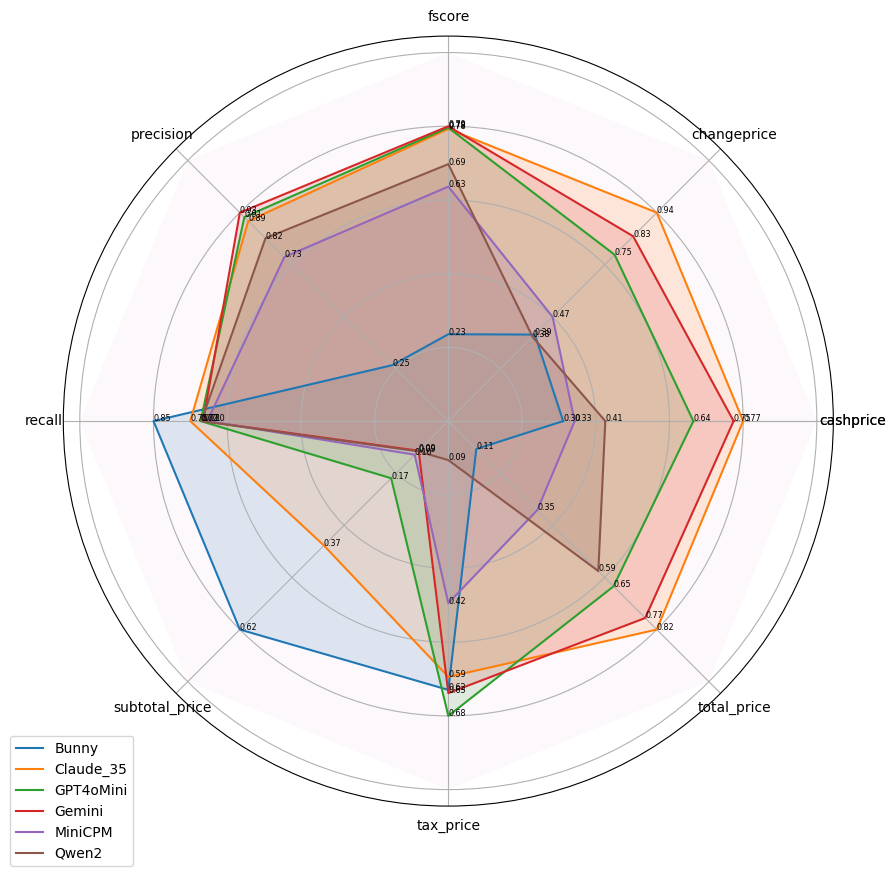

In [7]:
from torch_snippets.charts import spider

all_metrics = pd.concat([table_metrics, field_metrics])
spider(all_metrics.T)

---